# IQR

## Random Under Sampling

We will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [1]:
! pip install imblearn
! pip install scikit-plot

import math
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pprint import pprint
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score 
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../assets/creditcard.csv')

In [3]:
# Scale columns 'Amount' and 'Time'
std_scaler = StandardScaler()

df['amount_scaled'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             284807 non-null  float64
 1   V2             284807 non-null  float64
 2   V3             284807 non-null  float64
 3   V4             284807 non-null  float64
 4   V5             284807 non-null  float64
 5   V6             284807 non-null  float64
 6   V7             284807 non-null  float64
 7   V8             284807 non-null  float64
 8   V9             284807 non-null  float64
 9   V10            284807 non-null  float64
 10  V11            284807 non-null  float64
 11  V12            284807 non-null  float64
 12  V13            284807 non-null  float64
 13  V14            284807 non-null  float64
 14  V15            284807 non-null  float64
 15  V16            284807 non-null  float64
 16  V17            284807 non-null  float64
 17  V18            284807 non-nul

### Splitting testing and training data

In [4]:
X = df.drop('Class',axis=1) # independent columns - features
y = df.loc[:,'Class']       # target column - Class

In [5]:
print("Input Shape : ", X.shape)
print("Output Shape : ", y.shape)

Input Shape :  (284807, 30)
Output Shape :  (284807,)


In [6]:
#Train test split into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [7]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


## Model 1: Baseline Logistic Regression Model

In [8]:
# Create baseline logistic regression classifier
lr = LogisticRegression()

# Fit training data and training labels
lr.fit(X_train, y_train)

LogisticRegression()

### Baseline score

In [9]:
print(f'Training accuracy: {lr.score(X_train, y_train)}')
print(f'Testing accuracy: {lr.score(X_test, y_test)}')

Training accuracy: 0.999246272325086
Testing accuracy: 0.9991432824920649


## Random Under Sampling Using imblearn library

In [10]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
xr,yr = nm.fit_sample(X, y)

from collections import Counter
print('Original Count: {}'.format(Counter(y)))
print('Sampled Count: {}'.format(Counter(yr)))

# Now we have equal fraud and non fraud data.

new_df = pd.concat([pd.DataFrame(xr,columns=X.columns),pd.DataFrame(yr)],axis=1)

new_df = new_df.rename({0:'Class'},axis=1)

new_df.head()

Original Count: Counter({0: 284315, 1: 492})
Sampled Count: Counter({0: 492, 1: 492})


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,amount_scaled,time_scaled,Class
0,1.461443,-0.582645,-2.297665,1.089190,0.054096,-1.349453,0.724947,-0.429395,0.788068,-1.162223,...,-0.314868,-0.188230,-0.098629,0.084687,-0.328303,-0.036457,0.041937,0.831044,1.098995,0
1,1.719332,1.028017,-2.056034,4.206490,1.101320,-0.713744,0.672316,-0.140571,-1.506492,0.325083,...,-0.766599,0.117322,-0.242448,-0.108112,-0.207626,-0.031489,0.022199,-0.019789,0.998338,0
2,1.710412,-0.177393,-2.423228,0.851039,0.570935,-0.825292,0.500599,-0.273878,0.775121,-1.171742,...,-0.316022,-0.057084,0.443548,0.156303,-0.336014,-0.012914,0.028351,0.337160,0.872896,0
3,1.770391,-0.043727,-2.141603,0.927294,0.326160,-1.265856,0.526820,-0.383667,0.738697,-1.109431,...,-0.181550,-0.054756,-0.223937,0.155648,-0.302637,0.000238,0.013488,0.185593,0.502171,0
4,1.600837,-0.566270,-2.067152,0.523750,0.242095,-0.662067,0.412231,-0.266734,0.862860,-1.038563,...,-0.568326,0.004750,0.508183,-0.096610,-0.138248,-0.043426,0.027720,0.575806,1.099374,0


We will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

## Correlation Matrices

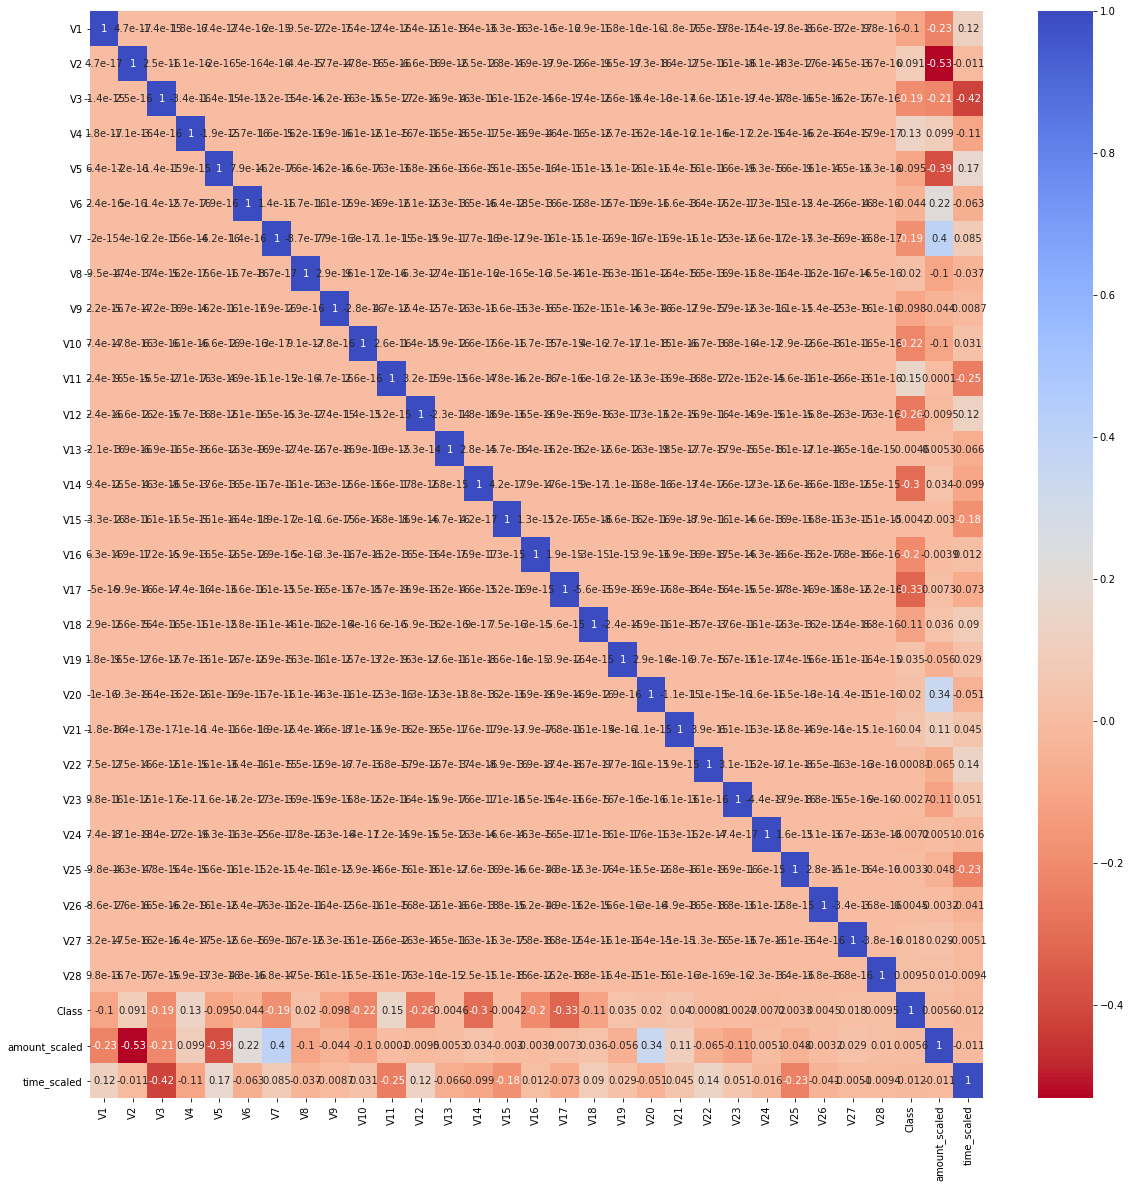

In [11]:
#for Original Data frame

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r')

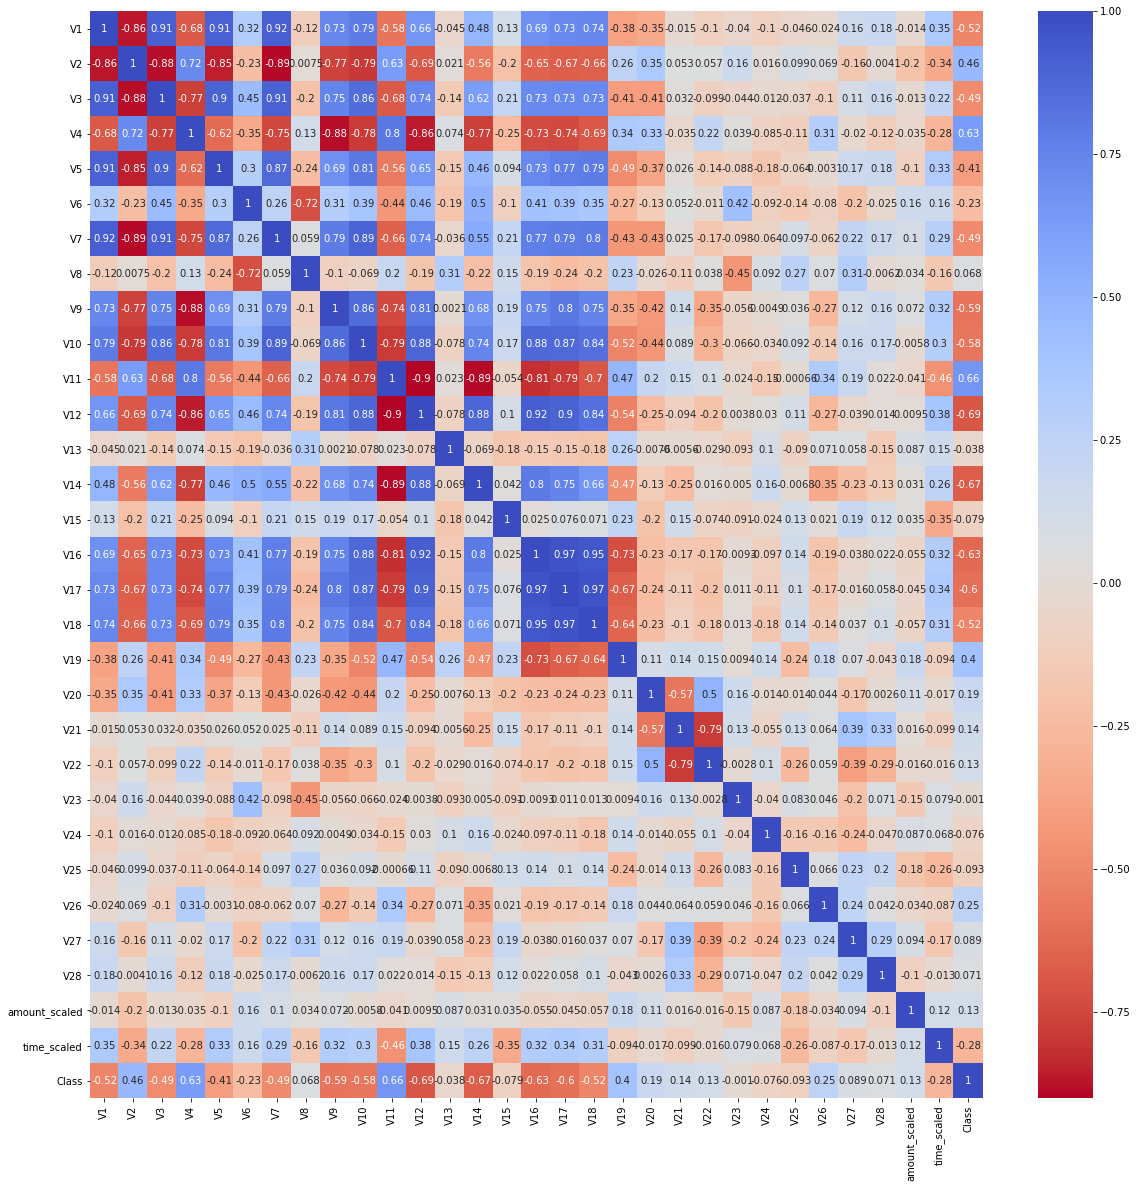

In [12]:
#For new sampled (undersampling) df

plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm_r')

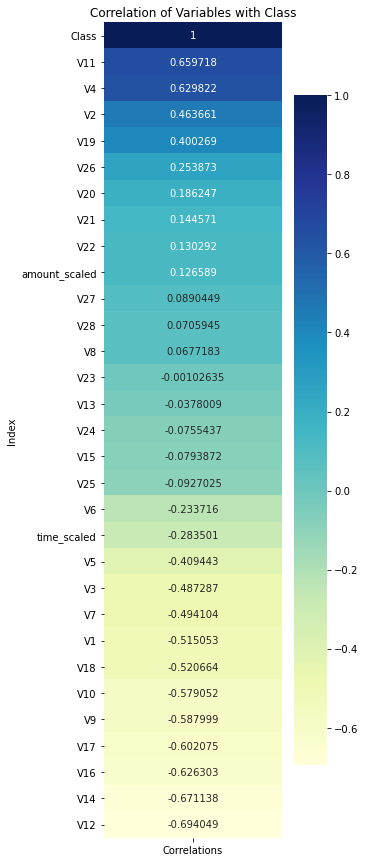

In [13]:
corr = new_df.corrwith(new_df['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

### Boxplots

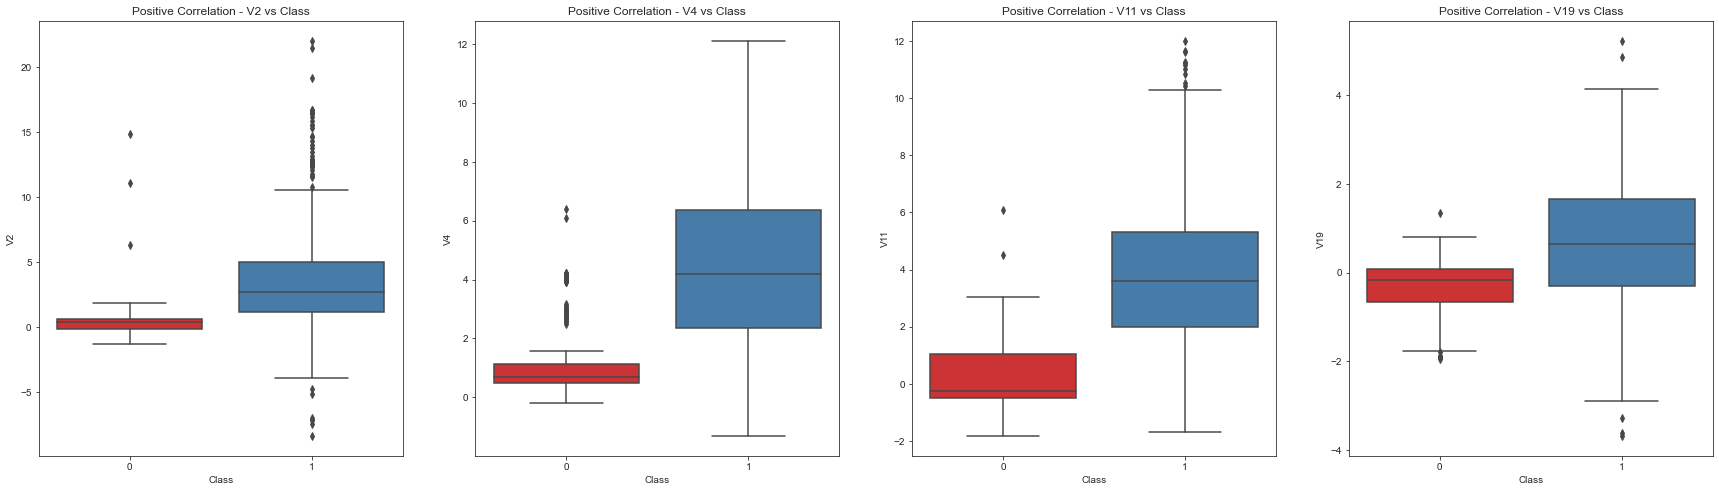

In [14]:
sns.set_style('ticks')
f, axes = plt.subplots(ncols=4, figsize=(30,8))

sns.boxplot(x='Class', y='V11', data=new_df, palette='Set1', ax=axes[2])
axes[2].set_title('Positive Correlation - V11 vs Class')

sns.boxplot(x='Class', y='V4', data=new_df, palette='Set1', ax=axes[1])
axes[1].set_title('Positive Correlation - V4 vs Class')

sns.boxplot(x='Class', y='V2', data=new_df, palette='Set1', ax=axes[0])
axes[0].set_title('Positive Correlation - V2 vs Class')

sns.boxplot(x='Class', y='V19', data=new_df, palette='Set1', ax=axes[3])
axes[3].set_title('Positive Correlation - V19 vs Class')

plt.show()

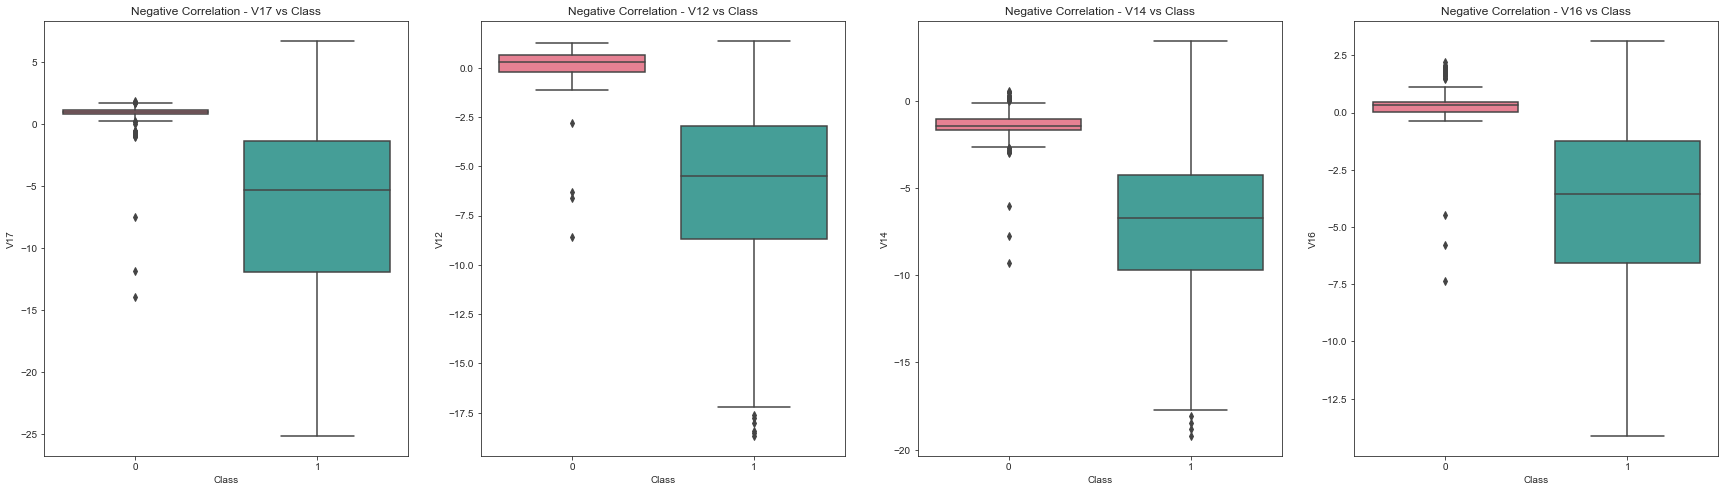

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(30,8))

sns.boxplot(x='Class', y='V17', data=new_df, palette='husl', ax=axes[0])
axes[0].set_title('Negative Correlation - V17 vs Class')

sns.boxplot(x='Class', y='V16', data=new_df, palette='husl', ax=axes[3])
axes[3].set_title('Negative Correlation - V16 vs Class')

sns.boxplot(x='Class', y='V14', data=new_df, palette='husl', ax=axes[2])
axes[2].set_title('Negative Correlation - V14 vs Class')

sns.boxplot(x='Class', y='V12', data=new_df, palette='husl', ax=axes[1])
axes[1].set_title('Negative Correlation - V12 vs Class')

plt.show()

### Distribution Plot

Top 4 Features - Positive Correlation with Class



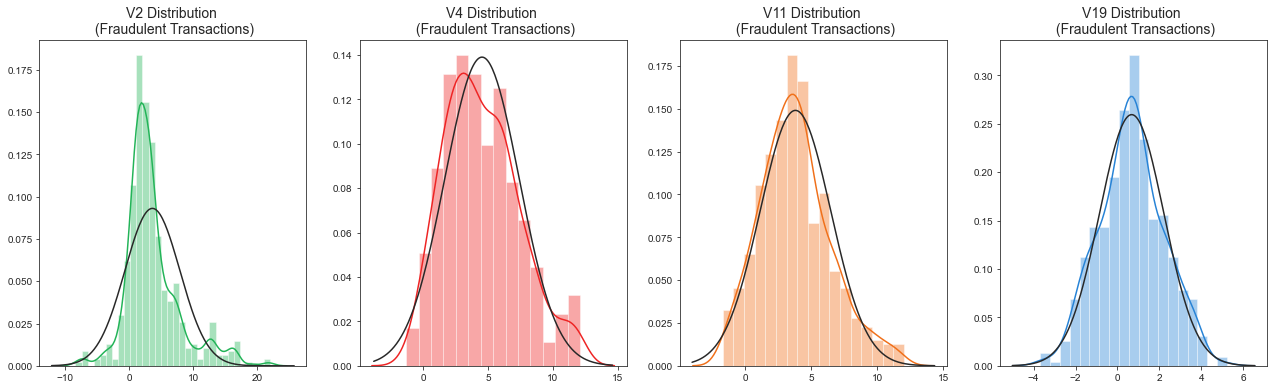

In [16]:
print('Top 4 Features - Positive Correlation with Class\n')
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(22, 6))

v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v11_fraud_dist, ax=ax3, fit=norm, color='#f0701a')
ax3.set_title('V11 Distribution \n (Fraudulent Transactions)', fontsize=14)

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v4_fraud_dist, ax=ax2, fit=norm, color='#ee2424')
ax2.set_title('V4 Distribution \n (Fraudulent Transactions)', fontsize=14)

v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(v2_fraud_dist, ax=ax1, fit=norm, color='#23b458')
ax1.set_title('V2 Distribution \n (Fraudulent Transactions)', fontsize=14)

v19_fraud_dist = new_df['V19'].loc[new_df['Class'] == 1].values
sns.distplot(v19_fraud_dist, ax=ax4, fit=norm, color='#2783d6')
ax4.set_title('V19 Distribution \n (Fraudulent Transactions)', fontsize=14)

plt.show()

Top 4 Features - Negative Correlation with Class



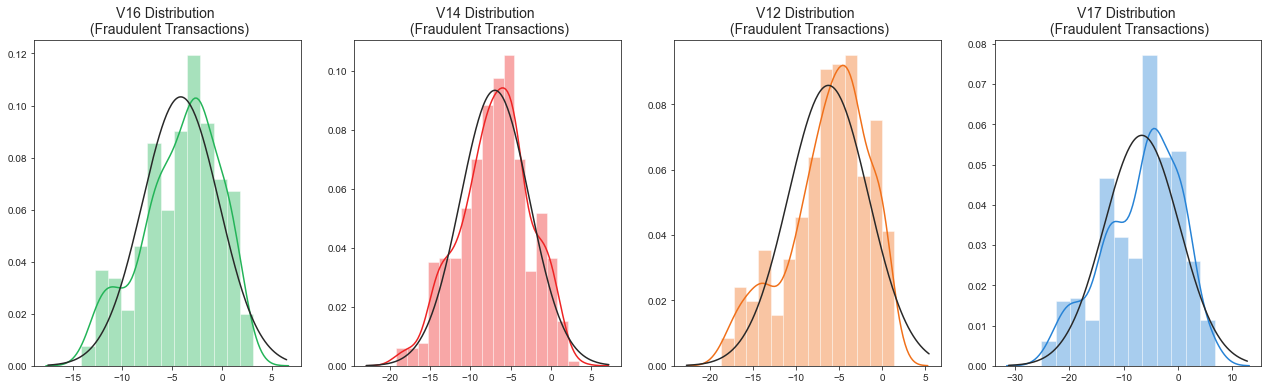

In [17]:
print('Top 4 Features - Negative Correlation with Class\n')
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(22, 6))

v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v17_fraud_dist, ax=ax4, fit=norm, color='#2783d6')
ax4.set_title('V17 Distribution \n (Fraudulent Transactions)', fontsize=14)

v16_fraud_dist = new_df['V16'].loc[new_df['Class'] == 1].values
sns.distplot(v16_fraud_dist, ax=ax1, fit=norm, color='#23b458')
ax1.set_title('V16 Distribution \n (Fraudulent Transactions)', fontsize=14)

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax2, fit=norm, color='#ee2424')
ax2.set_title('V14 Distribution \n (Fraudulent Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax3, fit=norm, color='#f0701a')
ax3.set_title('V12 Distribution \n (Fraudulent Transactions)', fontsize=14)


plt.show()

### Removal of Extreme Outliers

In order to obtain a good model performance, there is a need to identify and remove extreme outliers from features that have a high correlation with our classes. This clean-up process helps to ensure that the observations best represent the problem.

One of the techniques is to use the Interquartile Range Method (IQR).

The threshold for removing outliers has been determined at 1.5 to prevent the risk of information loss, which will cause the models to have a lower accuracy (ie. under-fitting).

In [18]:
print('Removal of Extreme Outliers from Top 4 Features which are Positively Correlated with Class\n')

# V11 - Removing extreme outliers from fraudulent transactions
print('V11 Analysis')
v11_fraud = new_df['V11'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v11_iqr = q75 - q25
print('IQR: {}'.format(v11_iqr))

v11_cut_off = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
print('Cut-Off: {}'.format(v11_cut_off))
print('Lower Limit: {}'.format(v11_lower))
print('Upper Limit: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V11'] > v11_upper) | (new_df['V11'] < v11_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')

# V4 - Removing extreme outliers from fraudulent transactions
print('V4 Analysis')
v4_fraud = new_df['V4'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v4_iqr = q75 - q25
print('IQR: {}'.format(v4_iqr))

v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
print('Cut-Off: {}'.format(v4_cut_off))
print('Lower Limit: {}'.format(v4_lower))
print('Upper Limit: {}'.format(v4_upper))

outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V4'] > v4_upper) | (new_df['V4'] < v4_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')

# V2 - Removing extreme outliers from fraudulent transactions
print('V2 Analysis')
v2_fraud = new_df['V2'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v2_iqr = q75 - q25
print('IQR: {}'.format(v2_iqr))

v2_cut_off = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
print('Cut-Off: {}'.format(v2_cut_off))
print('Lower Limit: {}'.format(v2_lower))
print('Upper Limit: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V2'] > v2_upper) | (new_df['V2'] < v2_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')

# V19 - Removing extreme outliers from fraudulent transactions
print('V19 Analysis')
v19_fraud = new_df['V19'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v19_iqr = q75 - q25
print('IQR: {}'.format(v19_iqr))

v19_cut_off = v19_iqr * 1.5
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
print('Cut-Off: {}'.format(v19_cut_off))
print('Lower Limit: {}'.format(v19_lower))
print('Upper Limit: {}'.format(v19_upper))

outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V19'] > v19_upper) | (new_df['V19'] < v19_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))

Removal of Extreme Outliers from Top 4 Features which are Positively Correlated with Class

V11 Analysis
25th Quartile: 1.973396660607005 | 75th Quartile: 5.307077600096335
IQR: 3.33368093948933
Cut-Off: 5.000521409233995
Lower Limit: -3.0271247486269903
Upper Limit: 10.30759900933033
Number of Outliers: 10
Number of Instances after Removing Outliers: 974


V4 Analysis
25th Quartile: 2.33144342069487 | 75th Quartile: 6.228090686894386
IQR: 3.8966472661995155
Cut-Off: 5.844970899299273
Lower Limit: -3.513527478604403
Upper Limit: 12.07306158619366
Number of Outliers: 1
Number of Instances after Removing Outliers: 973


V2 Analysis
25th Quartile: 1.1762702245705 | 75th Quartile: 4.64182734988813
IQR: 3.4655571253176305
Cut-Off: 5.198335687976446
Lower Limit: -4.022065463405946
Upper Limit: 9.840163037864576
Number of Outliers: 51
Number of Instances after Removing Outliers: 920


V19 Analysis
25th Quartile: -0.428087850292456 | 75th Quartile: 1.7840958284909576
IQR: 2.2121836787834135
Cu

In [19]:
print('Removal of Extreme Outliers from Top 4 Features which are Negatively Correlated with Class\n')

# V17 - Removing extreme outliers from fraudulent transactions
print('V17 Analysis')
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('IQR: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Cut-Off: {}'.format(v17_cut_off))
print('Lower Limit: {}'.format(v17_lower))
print('Upper Limit: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v17_upper) | (new_df['V17'] < v17_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')

# V16 - Removing extreme outliers from fraudulent transactions
print('V16 Analysis')
v16_fraud = new_df['V16'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('IQR: {}'.format(v16_iqr))

v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut-Off: {}'.format(v16_cut_off))
print('Lower Limit: {}'.format(v16_lower))
print('Upper Limit: {}'.format(v16_upper))

outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V16'] > v16_upper) | (new_df['V16'] < v16_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')


# V14 - Removing extreme outliers from fraudulent transactions
print('V14 Analysis')
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('IQR: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut-Off: {}'.format(v14_cut_off))
print('Lower Limit: {}'.format(v14_lower))
print('Upper Limit: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')


# V12 - Removing extreme outliers from fraudulent transactions
print('V12 Analysis')
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('25th Quartile: {} | 75th Quartile: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('IQR: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut-Off: {}'.format(v12_cut_off))
print('Lower Limit: {}'.format(v12_lower))
print('Upper Limit: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Number of Outliers: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after Removing Outliers: {}'.format(len(new_df)))
print('\n')




Removal of Extreme Outliers from Top 4 Features which are Negatively Correlated with Class

V17 Analysis
25th Quartile: -9.750776386541231 | 75th Quartile: -0.391051374531861
IQR: 9.35972501200937
Cut-Off: 14.039587518014056
Lower Limit: -23.790363904555285
Upper Limit: 13.648536143482195
Number of Outliers: 3
Number of Instances after Removing Outliers: 916


V16 Analysis
25th Quartile: -5.65999214495357 | 75th Quartile: -0.939367707744607
IQR: 4.720624437208963
Cut-Off: 7.080936655813445
Lower Limit: -12.740928800767016
Upper Limit: 6.141568948068838
Number of Outliers: 4
Number of Instances after Removing Outliers: 912


V14 Analysis
25th Quartile: -9.572938112392258 | 75th Quartile: -4.191355441597185
IQR: 5.381582670795073
Cut-Off: 8.072374006192609
Lower Limit: -17.64531211858487
Upper Limit: 3.881018564595424
Number of Outliers: 0
Number of Instances after Removing Outliers: 912


V12 Analysis
25th Quartile: -8.021620964921379 | 75th Quartile: -2.7249358141366447
IQR: 5.29668515

In [20]:
new_df.shape

(900, 31)

In [21]:
new_df['Class'].value_counts()

0    490
1    410
Name: Class, dtype: int64

In [22]:
X_clean = new_df.iloc[:,0:30] # independent columns - features
y_clean = new_df.iloc[:,30]   # target column - Class

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean,
                                                                            test_size = 0.2,
                                                                            random_state = 1)